Predicción de éxitos en oportunidades comerciales
La empresa de consultoría AlixPartners nos propone nuevamente adentrarnos en un caso de negocio. 
El objetivo es ayudar a una empresa cliente que comercializa equipos de aire acondicionado para grandes superficies. 
¿Será posible predecir qué oportunidades comerciales se van a concretar?

In [ ]:

import xgboost as xgb  #Libreria de algoriitmo de boosting, sive para hacer la prediccion
from sklearn.metrics import classification_report, confusion_matrix 
import pandas as pd               #Manejo de Datos
import numpy as np                #Calculo numerico
import seaborn as sns             #Libreria de Visualizaciones
import matplotlib.pyplot as plt   #Libreria de Visualizaciones

In [119]:
data = pd.read_csv('C:/Users\Ariel Fleiderman/Downloads/Entrenamieto_ECI_2020.csv')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [121]:
data.shape

(16947, 52)

ANALISIS DE VARIABLES

In [122]:
data['Product_Type'].value_counts()

None              15935
Other               515
Product_Type_3      179
Product_Type_1      142
Product_Type_0       94
Product_Type_4       73
Product_Type_2        9
Name: Product_Type, dtype: int64

In [123]:
data['Billing_Country'].value_counts()

Japan                     4879
United States             3802
Germany                   1979
Australia                 1169
India                      672
                          ... 
Oman                         1
Argentina                    1
Bosnia and Herzegovina       1
Colombia                     1
Ecuador                      1
Name: Billing_Country, Length: 80, dtype: int64

In [124]:
data['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [125]:
data['Product_Name'].value_counts()


Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
                   ... 
Product_Name_48       1
Product_Name_52       1
Product_Name_44       1
Product_Name_353      1
Product_Name_189      1
Name: Product_Name, Length: 456, dtype: int64

In [126]:
data['Prod_Category_A'].value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

In [127]:
data['Product_Category_B'].value_counts()

None                     15928
Other                      523
Product_Category_B_2        59
Product_Category_B_12       51
Product_Category_B_7        47
Product_Category_B_4        37
Product_Category_B_5        36
Product_Category_B_17       27
Product_Category_B_1        24
Product_Category_B_3        23
Product_Category_B_8        23
Product_Category_B_19       22
Product_Category_B_11       21
Product_Category_B_13       18
Product_Category_B_16       17
Product_Category_B_9        17
Product_Category_B_24       16
Product_Category_B_20        9
Product_Category_B_6         9
Product_Category_B_21        8
Product_Category_B_15        8
Product_Category_B_23        5
Product_Category_B_26        4
Product_Category_B_14        4
Product_Category_B_0         3
Product_Category_B_27        3
Product_Category_B_10        3
Product_Category_B_22        2
Name: Product_Category_B, dtype: int64

In [128]:
data['Currency'].value_counts()

None    16052
EUR       475
USD       420
Name: Currency, dtype: int64

In [129]:
data['Brand'].value_counts()

None        15911
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_21       17
Brand_13       17
Brand_7        17
Brand_20       10
Brand_23       10
Brand_27        5
Brand_17        5
Brand_2         4
Brand_4         4
Brand_0         4
Brand_12        3
Brand_16        2
Brand_6         1
Brand_1         1
Brand_26        1
Brand_3         1
Brand_19        1
Name: Brand, dtype: int64

In [130]:
data['Territory'].value_counts()

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Solomon Islands       1
Georgia               1
Croatia               1
Slovenia              1
Monaco                1
Name: Territory, Length: 76, dtype: int64

In [131]:
data['Opportunity_ID'].value_counts()

12460    36
2008     36
5123     26
6606     26
2911     24
         ..
7482      1
5435      1
3400      1
7498      1
0         1
Name: Opportunity_ID, Length: 9841, dtype: int64

In [132]:
data['Opportunity_Name'].value_counts()

Opportunity_Name_5036     36
Opportunity_Name_9795     36
Opportunity_Name_11461    26
Opportunity_Name_12179    26
Opportunity_Name_6835     24
                          ..
Opportunity_Name_6520      1
Opportunity_Name_8522      1
Opportunity_Name_3743      1
Opportunity_Name_6724      1
Opportunity_Name_10697     1
Name: Opportunity_Name, Length: 9841, dtype: int64

In [133]:
data['Opportunity_Type'].value_counts()

Opportunity_Type_1     6819
Opportunity_Type_7     5763
Opportunity_Type_19    1900
Opportunity_Type_8     1458
Opportunity_Type_12     279
Opportunity_Type_3      275
Opportunity_Type_20     175
Opportunity_Type_2       70
Opportunity_Type_4       51
Opportunity_Type_10      34
Opportunity_Type_9       23
Opportunity_Type_14      15
Opportunity_Type_5       14
Opportunity_Type_18      11
Opportunity_Type_22      10
Opportunity_Type_15       9
Opportunity_Type_0        8
Opportunity_Type_17       8
Opportunity_Type_21       6
Opportunity_Type_23       5
Opportunity_Type_16       4
Opportunity_Type_13       4
Opportunity_Type_11       3
Opportunity_Type_6        2
Opportunity_Type_24       1
Name: Opportunity_Type, dtype: int64

[Text(0, 0, 'EMEA'),
 Text(0, 0, 'Americas'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'APAC'),
 Text(0, 0, 'Middle East')]

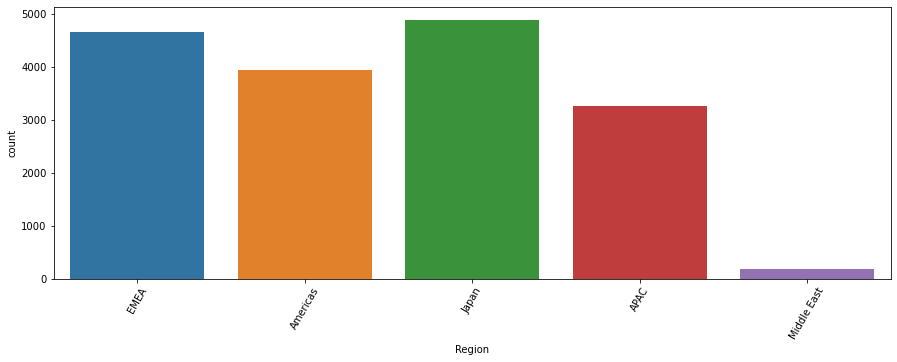

In [134]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = data, x = "Region")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

[Text(0, 0, 'None'),
 Text(0, 0, 'NW America'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'UAE (Dubai)'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'NE America'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Tunisia'),
 Text(0, 0, 'SE America'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'SW America'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Central America'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Kuwait'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Indonesia'),
 Text(0, 0, 'China (PRC)'),
 Text(0, 0, 'KSA'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Jordan'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Morocco'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Sweden'),
 Tex

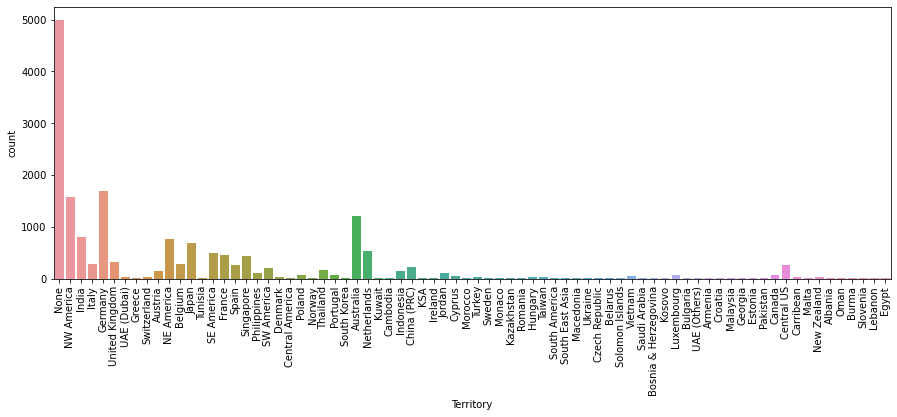

In [135]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = data, x = "Territory")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Opportunity_Type_1'),
 Text(0, 0, 'Opportunity_Type_19'),
 Text(0, 0, 'Opportunity_Type_7'),
 Text(0, 0, 'Opportunity_Type_8'),
 Text(0, 0, 'Opportunity_Type_2'),
 Text(0, 0, 'Opportunity_Type_4'),
 Text(0, 0, 'Opportunity_Type_11'),
 Text(0, 0, 'Opportunity_Type_20'),
 Text(0, 0, 'Opportunity_Type_12'),
 Text(0, 0, 'Opportunity_Type_3'),
 Text(0, 0, 'Opportunity_Type_5'),
 Text(0, 0, 'Opportunity_Type_15'),
 Text(0, 0, 'Opportunity_Type_0'),
 Text(0, 0, 'Opportunity_Type_14'),
 Text(0, 0, 'Opportunity_Type_18'),
 Text(0, 0, 'Opportunity_Type_23'),
 Text(0, 0, 'Opportunity_Type_9'),
 Text(0, 0, 'Opportunity_Type_21'),
 Text(0, 0, 'Opportunity_Type_22'),
 Text(0, 0, 'Opportunity_Type_10'),
 Text(0, 0, 'Opportunity_Type_17'),
 Text(0, 0, 'Opportunity_Type_13'),
 Text(0, 0, 'Opportunity_Type_6'),
 Text(0, 0, 'Opportunity_Type_16'),
 Text(0, 0, 'Opportunity_Type_24')]

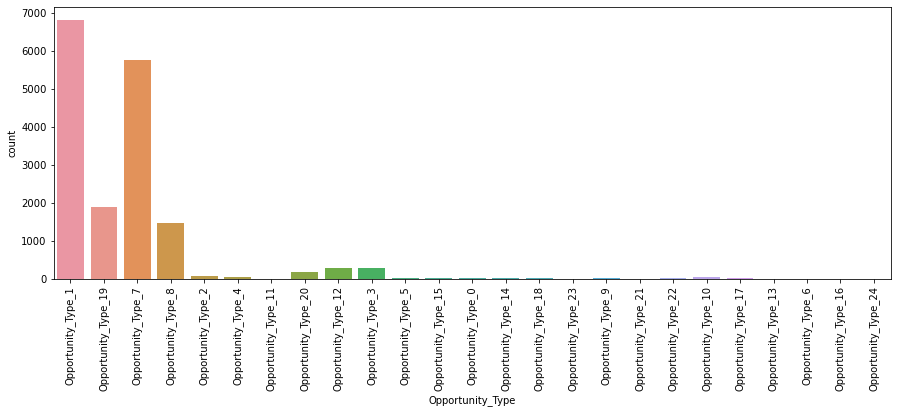

In [136]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = data, x = "Opportunity_Type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Opportunity_Name_12598'),
 Text(0, 0, 'Opportunity_Name_12600'),
 Text(0, 0, 'Opportunity_Name_469'),
 Text(0, 0, 'Opportunity_Name_415'),
 Text(0, 0, 'Opportunity_Name_851'),
 Text(0, 0, 'Opportunity_Name_939'),
 Text(0, 0, 'Opportunity_Name_1618'),
 Text(0, 0, 'Opportunity_Name_8227'),
 Text(0, 0, 'Opportunity_Name_6151'),
 Text(0, 0, 'Opportunity_Name_6817'),
 Text(0, 0, 'Opportunity_Name_5971'),
 Text(0, 0, 'Opportunity_Name_7036'),
 Text(0, 0, 'Opportunity_Name_3858'),
 Text(0, 0, 'Opportunity_Name_4863'),
 Text(0, 0, 'Opportunity_Name_7004'),
 Text(0, 0, 'Opportunity_Name_2353'),
 Text(0, 0, 'Opportunity_Name_2202'),
 Text(0, 0, 'Opportunity_Name_6594'),
 Text(0, 0, 'Opportunity_Name_6849'),
 Text(0, 0, 'Opportunity_Name_9078'),
 Text(0, 0, 'Opportunity_Name_4062'),
 Text(0, 0, 'Opportunity_Name_6397'),
 Text(0, 0, 'Opportunity_Name_5583'),
 Text(0, 0, 'Opportunity_Name_2804'),
 Text(0, 0, 'Opportunity_Name_2801'),
 Text(0, 0, 'Opportunity_Name_10106'),
 Text(0, 0, '

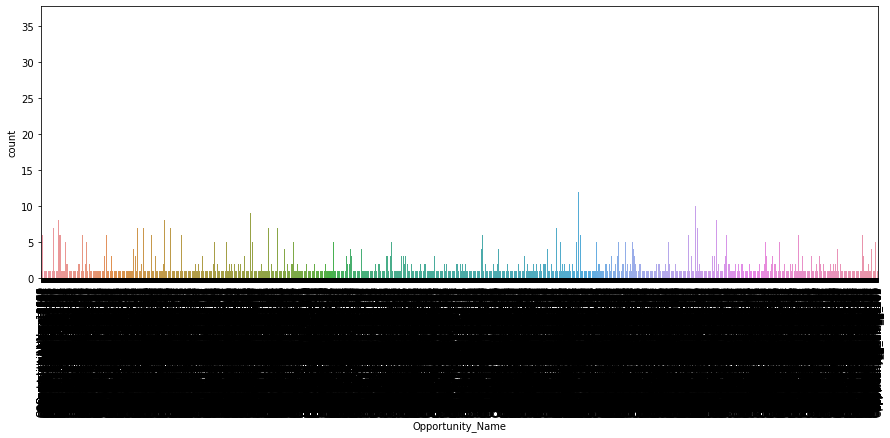

In [137]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = data, x = "Opportunity_Name")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '36'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '46'),
 Text(0, 0, '47'),
 Text(0, 0, '49'),
 Text(0, 0, '50'),
 Text(0, 0, '51'),
 Text(0, 0, '52'),
 Text(0, 0, '53'),
 Te

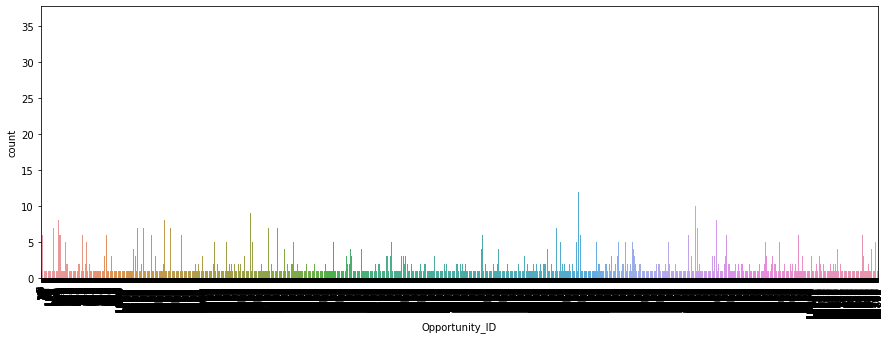

In [138]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = data, x = "Opportunity_ID")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Account_Type_2'),
 Text(0, 0, 'Account_Type_5'),
 Text(0, 0, 'Account_Type_0'),
 Text(0, 0, 'None'),
 Text(0, 0, 'Account_Type_1'),
 Text(0, 0, 'Account_Type_4'),
 Text(0, 0, 'Account_Type_6')]

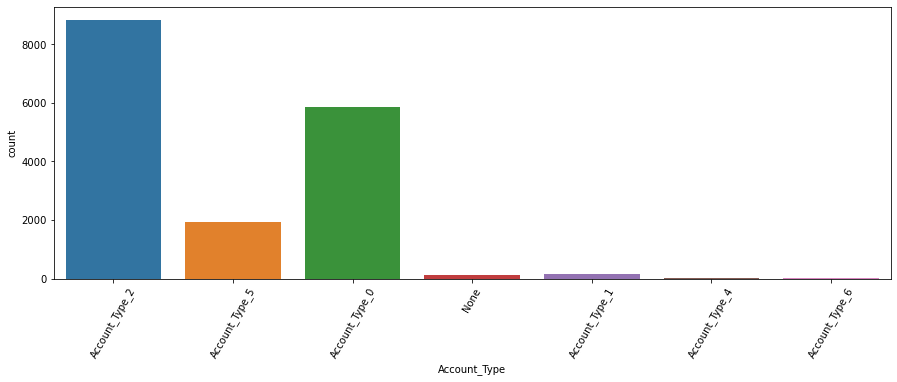

In [139]:

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = data, x = "Account_Type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

[Text(0, 0, '2016 - 5'),
 Text(0, 0, '2016 - 1'),
 Text(0, 0, '2018 - 2'),
 Text(0, 0, '2017 - 2'),
 Text(0, 0, '2016 - 2'),
 Text(0, 0, '2016 - 4'),
 Text(0, 0, '2016 - 3'),
 Text(0, 0, '2017 - 4'),
 Text(0, 0, '2016 - 7'),
 Text(0, 0, '2018 - 4'),
 Text(0, 0, '2016 - 6'),
 Text(0, 0, '2016 - 12'),
 Text(0, 0, '2016 - 11'),
 Text(0, 0, '2016 - 10'),
 Text(0, 0, '2016 - 9'),
 Text(0, 0, '2016 - 8'),
 Text(0, 0, '2017 - 7'),
 Text(0, 0, '2017 - 1'),
 Text(0, 0, '2017 - 10'),
 Text(0, 0, '2017 - 12'),
 Text(0, 0, '2017 - 11'),
 Text(0, 0, '2017 - 9'),
 Text(0, 0, '2017 - 8'),
 Text(0, 0, '2018 - 1'),
 Text(0, 0, '2017 - 3'),
 Text(0, 0, '2017 - 5'),
 Text(0, 0, '2018 - 3'),
 Text(0, 0, '2017 - 6'),
 Text(0, 0, '2018 - 5'),
 Text(0, 0, '2018 - 10'),
 Text(0, 0, '2018 - 9'),
 Text(0, 0, '2018 - 6'),
 Text(0, 0, '2019 - 7'),
 Text(0, 0, '2018 - 8'),
 Text(0, 0, '2018 - 7'),
 Text(0, 0, '2018 - 11'),
 Text(0, 0, '2019 - 1'),
 Text(0, 0, '2018 - 12'),
 Text(0, 0, '2019 - 4'),
 Text(0, 0, '201

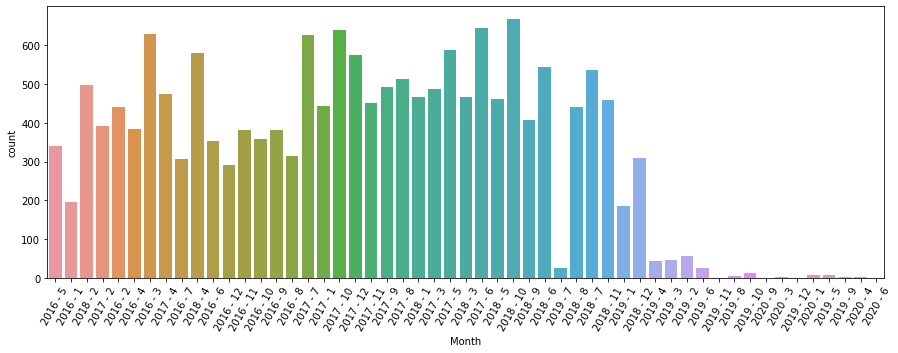

In [140]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = data, x = "Month")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
ID,1.000000,0.171130,0.047843,-0.121780,-0.134126,NaN,-0.114591,0.280922,0.041085,-0.329401,-0.037160,-0.001231,0.025270
"Pricing, Delivery_Terms_Quote_Appr",0.171130,1.000000,0.577095,0.459038,0.330655,NaN,-0.013325,0.127084,-0.003139,-0.037708,0.076886,0.031126,0.054061
"Pricing, Delivery_Terms_Approved",0.047843,0.577095,1.000000,0.217751,0.571042,NaN,0.036097,0.061176,-0.004733,0.067936,-0.041417,-0.015369,-0.007091
Bureaucratic_Code_0_Approval,-0.121780,0.459038,0.217751,1.000000,0.718640,NaN,0.061041,-0.164837,-0.010379,0.143798,0.155132,0.069474,0.101278
Bureaucratic_Code_0_Approved,-0.134126,0.330655,0.571042,0.718640,1.000000,NaN,0.050105,-0.122603,-0.003593,0.123372,0.027328,0.020603,0.030967
Submitted_for_Approval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opportunity_ID,-0.114591,-0.013325,0.036097,0.061041,0.050105,NaN,1.000000,-0.091231,-0.033939,0.522663,0.003871,0.015518,0.007336
ASP,0.280922,0.127084,0.061176,-0.164837,-0.122603,NaN,-0.091231,1.000000,0.090615,-0.166619,-0.070323,0.121617,0.109648
ASP_(converted),0.041085,-0.003139,-0.004733,-0.010379,-0.003593,NaN,-0.033939,0.090615,1.000000,-0.081704,-0.000904,0.064521,0.441941
Delivery_Year,-0.329401,-0.037708,0.067936,0.143798,0.123372,NaN,0.522663,-0.166619,-0.081704,1.000000,0.047786,0.041816,0.032533


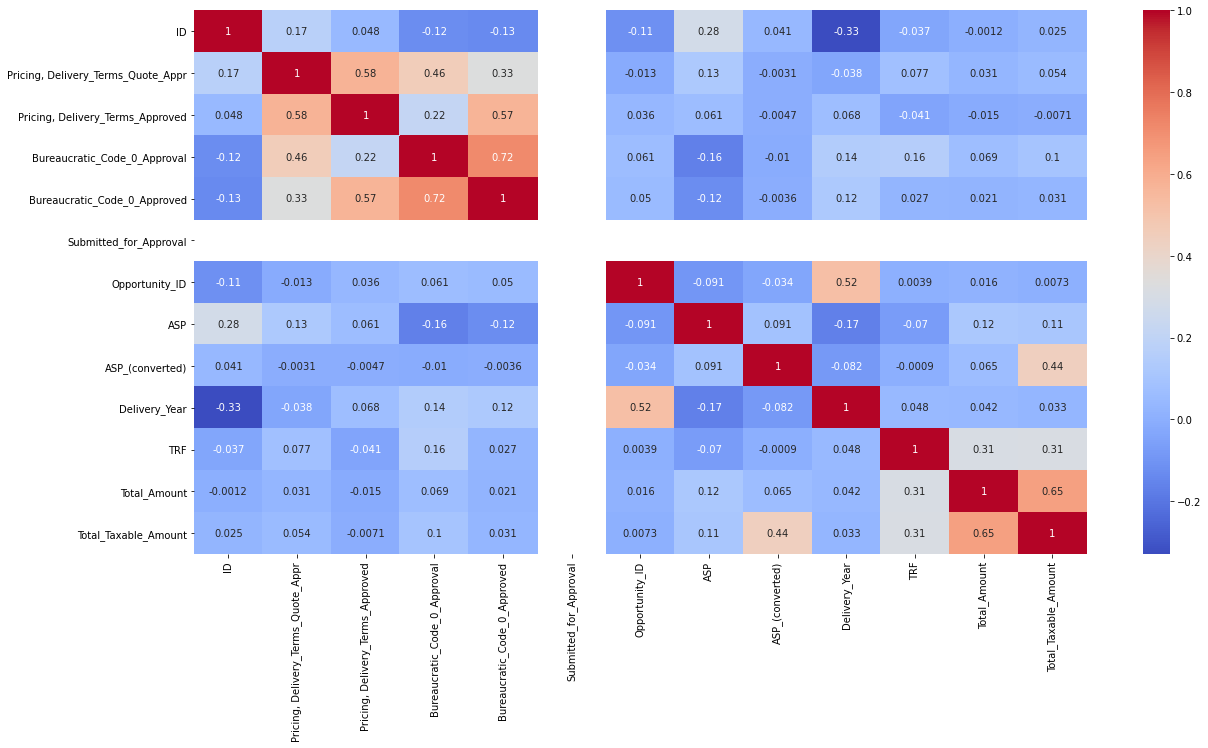

In [141]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap='coolwarm',annot=True)
c

In [142]:
data['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [143]:
data['Source '].value_counts()

None         9497
Source_7     2965
Source_9     1459
Source_11    1421
Source_13     786
Source_3      418
Source_1      137
Source_10     106
Source_2       86
Source_4       43
Source_6       19
Source_0        7
Source_12       2
Source_5        1
Name: Source , dtype: int64

In [144]:
data['Account_Owner'].value_counts()

Person_Name_50    3730
Person_Name_13    1328
Person_Name_8     1286
Person_Name_43    1241
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     682
Person_Name_4      664
Person_Name_65     631
Person_Name_64     577
Person_Name_16     439
Person_Name_46     381
Person_Name_45     357
Person_Name_2      333
Person_Name_38     326
Person_Name_42     304
Person_Name_66     258
Person_Name_60     227
Person_Name_49     201
Person_Name_59     201
Person_Name_62     179
Person_Name_54     178
Person_Name_52     172
Person_Name_5      166
Person_Name_21     166
Person_Name_63     138
Person_Name_55     138
Person_Name_51     108
Person_Name_39     104
Person_Name_33      86
Person_Name_14      74
Person_Name_61      72
Person_Name_44      57
Person_Name_41      51
Person_Name_9       50
Person_Name_58      15
Person_Name_26      12
Person_Name_11      10
Person_Name_29       8
Person_Name_25       7
Person_Name_36       7
Person_Name_23       4
Person_Name_34       3
Person_Name

TRATAMIENTO DE VARIABLES Y ELIMINASION 

In [145]:
data.drop(columns=['Product_Type','Billing_Country','Currency','Brand',
                   'Product_Category_B','Price',
                  'Size','Sales_Contract_No','ID','Brand',
                   'Product_Category_B','Territory','Pricing, Delivery_Terms_Approved','Total_Taxable_Amount_Currency','Currency','Total_Amount'
      ,'Total_Amount_Currency','Total_Taxable_Amount','Quote_Type','Prod_Category_A','TRF'
                  ,'Prod_Category_A','TRF' ,'Prod_Category_A','TRF' ,'Actual_Delivery_Date','Delivery_Quarter'
                  ,'Delivery_Year','Last_Modified_By','Delivery_Year','Last_Modified_Date'
                  ,'Quote_Expiry_Date','Last_Activity','Opportunity_Created_Date','Last_Modified_Date','ASP_Currency','ASP','ASP_(converted)_Currency','Account_Created_Date','Source '
                  ,'Month'], inplace=True)         


In [146]:
list(data)

['Region',
 'Pricing, Delivery_Terms_Quote_Appr',
 'Bureaucratic_Code_0_Approval',
 'Bureaucratic_Code_0_Approved',
 'Submitted_for_Approval',
 'Bureaucratic_Code',
 'Account_Name',
 'Opportunity_Name',
 'Opportunity_ID',
 'Account_Owner',
 'Opportunity_Owner',
 'Account_Type',
 'Opportunity_Type',
 'Delivery_Terms',
 'Product_Family',
 'Product_Name',
 'ASP_(converted)',
 'Planned_Delivery_Start_Date',
 'Planned_Delivery_End_Date',
 'Stage']

In [147]:
data['Region'].value_counts()#nada a modificar dumificar 

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [148]:
data['Pricing, Delivery_Terms_Quote_Appr'].value_counts()#nada a modificar dumificar 

1    13693
0     3254
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

In [149]:
data['Bureaucratic_Code_0_Approval'].value_counts()#nada a modificar dumificar 

0    8889
1    8058
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [150]:
data['Bureaucratic_Code_0_Approved'].value_counts()#nada a modificar dumificar 

0    11543
1     5404
Name: Bureaucratic_Code_0_Approved, dtype: int64

In [151]:
data['Submitted_for_Approval'].value_counts()#borrar por valor unico

0    16947
Name: Submitted_for_Approval, dtype: int64

In [152]:
data['Bureaucratic_Code'].value_counts()#dumificar nada a modificar

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [153]:
data['Account_Name'].value_counts()#designar a columna otros salvo 5 primeros

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
                     ... 
Account_Name_386        1
Account_Name_394        1
Account_Name_1150       1
Account_Name_1021       1
Account_Name_1755       1
Name: Account_Name, Length: 1635, dtype: int64

In [154]:
#Creamos un Array con las Account_Name_imp que NO queremos remplazar por "OTHERS"
Account_Name_imp =['Account_Name_1888','Account_Name_1836','Account_Name_25','Account_Name_1991','Account_Name_1642']

#Decimos que todas las Account_Name_imp de la Columna "Account_Name" que no aparecen en el Array(Account_Name) sea remplazadas por el string "OTHERS"
data.loc[~data["Account_Name"].isin(Account_Name_imp), "Account_Name"] = "OTHERS"

In [155]:
data['Opportunity_Name'].value_counts()#designar a columna otros salvo 5 primeros

Opportunity_Name_5036     36
Opportunity_Name_9795     36
Opportunity_Name_11461    26
Opportunity_Name_12179    26
Opportunity_Name_6835     24
                          ..
Opportunity_Name_6520      1
Opportunity_Name_8522      1
Opportunity_Name_3743      1
Opportunity_Name_6724      1
Opportunity_Name_10697     1
Name: Opportunity_Name, Length: 9841, dtype: int64

In [156]:
Opportunity_Name_imp =['Opportunity_Name_9795','Opportunity_Name_5036','Opportunity_Name_11461','Opportunity_Name_12179','Opportunity_Name_6835']
data.loc[~data["Opportunity_Name"].isin(Opportunity_Name_imp), "Opportunity_Name"] = "OTHERS"

In [157]:
data['Opportunity_ID'].value_counts()

12460    36
2008     36
5123     26
6606     26
2911     24
         ..
7482      1
5435      1
3400      1
7498      1
0         1
Name: Opportunity_ID, Length: 9841, dtype: int64

In [158]:
Opportunity_id_id =['12460','2008','5123','6606','2911']
data.loc[~data["Opportunity_ID"].isin(Opportunity_id_id), "Opportunity_ID"] = "OTHERS"

In [159]:
data['Account_Owner'].value_counts()

Person_Name_50    3730
Person_Name_13    1328
Person_Name_8     1286
Person_Name_43    1241
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     682
Person_Name_4      664
Person_Name_65     631
Person_Name_64     577
Person_Name_16     439
Person_Name_46     381
Person_Name_45     357
Person_Name_2      333
Person_Name_38     326
Person_Name_42     304
Person_Name_66     258
Person_Name_60     227
Person_Name_49     201
Person_Name_59     201
Person_Name_62     179
Person_Name_54     178
Person_Name_52     172
Person_Name_5      166
Person_Name_21     166
Person_Name_63     138
Person_Name_55     138
Person_Name_51     108
Person_Name_39     104
Person_Name_33      86
Person_Name_14      74
Person_Name_61      72
Person_Name_44      57
Person_Name_41      51
Person_Name_9       50
Person_Name_58      15
Person_Name_26      12
Person_Name_11      10
Person_Name_29       8
Person_Name_25       7
Person_Name_36       7
Person_Name_23       4
Person_Name_34       3
Person_Name

In [160]:
Account_Owner_id =['Person_Name_50','Person_Name_13','Person_Name_8','Person_Name_43','Person_Name_18']
data.loc[~data["Account_Owner"].isin(Account_Owner_id), "Account_Owner"] = "OTHERS"

In [161]:
data['Opportunity_Owner'].value_counts()

Person_Name_50    3781
Person_Name_8     1422
Person_Name_13    1254
Person_Name_18     982
Person_Name_43     838
Person_Name_3      832
Person_Name_4      687
Person_Name_32     686
Person_Name_19     615
Person_Name_64     516
Person_Name_16     446
Person_Name_23     422
Person_Name_46     329
Person_Name_65     322
Person_Name_49     286
Person_Name_48     256
Person_Name_38     254
Person_Name_66     243
Person_Name_44     240
Person_Name_39     211
Person_Name_60     207
Person_Name_62     174
Person_Name_52     173
Person_Name_54     171
Person_Name_5      169
Person_Name_59     134
Person_Name_45     128
Person_Name_2      118
Person_Name_41     113
Person_Name_51     111
Person_Name_55      91
Person_Name_33      87
Person_Name_14      82
Person_Name_11      77
Person_Name_30      69
Person_Name_63      67
Person_Name_40      50
Person_Name_25      49
Person_Name_20      49
Person_Name_22      43
Person_Name_26      33
Person_Name_12      23
Person_Name_37      21
Person_Name

In [162]:
Opportunity_Owner_id =['Person_Name_50','Person_Name_8','Person_Name_13','Person_Name_18','Person_Name_43','Person_Name_3']
data.loc[~data["Opportunity_Owner"].isin(Opportunity_Owner_id), "Opportunity_Owner"] = "OTHERS"

In [163]:
data['Account_Type'].value_counts()

Account_Type_2    8832
Account_Type_0    5868
Account_Type_5    1943
Account_Type_1     165
None               112
Account_Type_6      17
Account_Type_4      10
Name: Account_Type, dtype: int64

In [164]:
Account_Type_id =['Account_Type_2','Account_Type_0','Account_Type_5','Account_Type_1']
data.loc[~data["Account_Type"].isin(Account_Type_id), "Account_Type"] = "OTHERS"

In [165]:
data['Opportunity_Type'].value_counts()

Opportunity_Type_1     6819
Opportunity_Type_7     5763
Opportunity_Type_19    1900
Opportunity_Type_8     1458
Opportunity_Type_12     279
Opportunity_Type_3      275
Opportunity_Type_20     175
Opportunity_Type_2       70
Opportunity_Type_4       51
Opportunity_Type_10      34
Opportunity_Type_9       23
Opportunity_Type_14      15
Opportunity_Type_5       14
Opportunity_Type_18      11
Opportunity_Type_22      10
Opportunity_Type_15       9
Opportunity_Type_0        8
Opportunity_Type_17       8
Opportunity_Type_21       6
Opportunity_Type_23       5
Opportunity_Type_16       4
Opportunity_Type_13       4
Opportunity_Type_11       3
Opportunity_Type_6        2
Opportunity_Type_24       1
Name: Opportunity_Type, dtype: int64

In [166]:
Opportunity_Type_id =['pportunity_Type_1','Opportunity_Type_7','Opportunity_Type_19','Opportunity_Type_8','Opportunity_Type_12','Opportunity_Type_3']
data.loc[~data["Opportunity_Type"].isin(Opportunity_Type_id), "Opportunity_Type"] = "OTHERS"

In [167]:
data['Delivery_Terms'].value_counts()

Delivery_Terms_4    7712
Delivery_Terms_2    4633
Delivery_Terms_1    2936
Delivery_Terms_6     781
Delivery_Terms_5     636
Delivery_Terms_8     164
Delivery_Terms_3      41
Delivery_Terms_7      38
Delivery_Terms_0       6
Name: Delivery_Terms, dtype: int64

In [168]:
Delivery_Terms_id =['Delivery_Terms_4','Delivery_Terms_2','Delivery_Terms_1','elivery_Terms_6','Delivery_Terms_5']
data.loc[~data["Delivery_Terms"].isin(Delivery_Terms_id), "Delivery_Terms"] = "OTHERS"

In [169]:
data['Product_Family'].value_counts()

Product_Family_77     1345
Product_Family_133    1249
Product_Family_132     763
Product_Family_212     636
Product_Family_100     619
                      ... 
Product_Family_245       1
Product_Family_239       1
Product_Family_166       1
Product_Family_52        1
Product_Family_79        1
Name: Product_Family, Length: 227, dtype: int64

In [170]:
Product_Family_id =['Product_Family_77','Product_Family_133','Product_Family_132','Product_Family_212','Product_Family_100']
data.loc[~data["Product_Family"].isin(Product_Family_id), "Product_Family"] = "OTHERS"

In [171]:
data['Product_Name'].value_counts()

Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
                   ... 
Product_Name_48       1
Product_Name_52       1
Product_Name_44       1
Product_Name_353      1
Product_Name_189      1
Name: Product_Name, Length: 456, dtype: int64

In [172]:
Product_Name_id =['Product_Name_100','Product_Name_226','Product_Name_231','Product_Name_491','Product_Name_4']
data.loc[~data["Product_Name"].isin(Product_Name_id), "Product_Name"] = "OTHERS"

In [173]:
data['ASP_(converted)'].value_counts()

0.38000    570
0.40000    497
0.36000    326
0.39000    325
0.00000    300
          ... 
0.32365      1
0.67868      1
0.43820      1
0.47300      1
0.30567      1
Name: ASP_(converted), Length: 441, dtype: int64

In [174]:
ASP_converted_id =['0.38000','0.40000','0.36000','0.39000','0.00000']
data.loc[~data["ASP_(converted)"].isin(ASP_converted_id), "ASP_(converted)"] = "OTHERS"

In [175]:
 import  re ,  io 
from  pprint  import  pprint 
from  scipy.stats  import  rankdata ,  hmean ,  norm 
import  spacy 
import  os ,  pkgutil ,  json ,  urllib 
from  urllib.request  import  urlopen 
from  IPython.display import IFrame 
from  IPython.core.display  import  display ,  HTML 
from  scattertext  import  CorpusFromPandas ,  produce_scattertext_explorer 

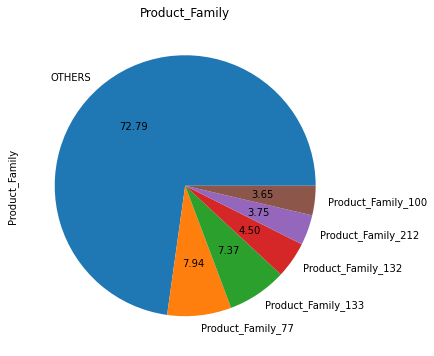

In [176]:
grafico = data['Product_Family'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Product_Family')

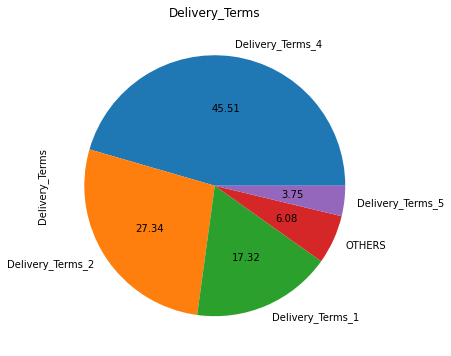

In [177]:
grafico = data['Delivery_Terms'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Delivery_Terms')

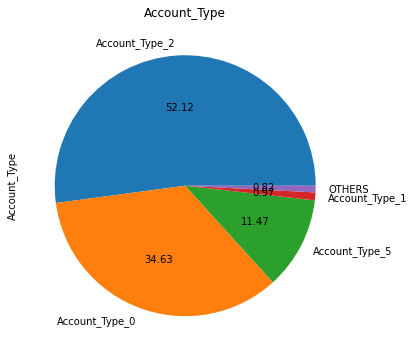

In [178]:
grafico = data['Account_Type'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Account_Type')

In [179]:
data['ASP_(converted)'].value_counts()


OTHERS    14929
0.38        570
0.4         497
0.36        326
0.39        325
0.0         300
Name: ASP_(converted), dtype: int64

PREPARACION DEL TARGET BUSCANDO CONOCER SI SE VENDE LOS PRODUCTOS

In [180]:
data['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [181]:
data=data[~data['Stage'].isin(['Proposal'])]
data=data[~data['Stage'].isin(['Negotiation'])]
data=data[~data['Stage'].isin(['Qualification'])]

In [182]:
data_1 = pd.get_dummies(data['Stage'], prefix='Stage') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 

In [183]:
data.head()

,Region,"Pricing, Delivery_Terms_Quote_Appr",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Name,Opportunity_Name,Opportunity_ID,Account_Owner,...,Opportunity_Type,Delivery_Terms,Product_Family,Product_Name,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Stage,Stage_Closed Lost,Stage_Closed Won
0,EMEA,1,1,1,0,Bureaucratic_Code_4,OTHERS,OTHERS,OTHERS,OTHERS,...,OTHERS,Delivery_Terms_2,Product_Family_77,OTHERS,OTHERS,5/1/2016,6/30/2016,Closed Lost,1,0
1,EMEA,0,0,0,0,Bureaucratic_Code_4,OTHERS,OTHERS,OTHERS,OTHERS,...,OTHERS,Delivery_Terms_2,Product_Family_77,Product_Name_100,OTHERS,1/18/2016,1/20/2016,Closed Won,0,1
2,Americas,0,0,0,0,Bureaucratic_Code_4,OTHERS,OTHERS,OTHERS,OTHERS,...,OTHERS,Delivery_Terms_4,OTHERS,OTHERS,OTHERS,1/25/2016,1/25/2016,Closed Won,0,1
3,Americas,1,1,0,0,Bureaucratic_Code_5,OTHERS,OTHERS,OTHERS,Person_Name_8,...,Opportunity_Type_19,Delivery_Terms_1,OTHERS,OTHERS,OTHERS,2/1/2018,3/31/2018,Closed Lost,1,0
4,Americas,1,1,0,0,Bureaucratic_Code_5,OTHERS,OTHERS,OTHERS,Person_Name_8,...,Opportunity_Type_19,Delivery_Terms_1,OTHERS,OTHERS,OTHERS,2/1/2018,2/28/2018,Closed Lost,1,0


In [184]:
data.drop(columns = ['Stage_Closed Lost','Stage'], inplace=True)

COMPARAMOS TARGET CON VARIABLES

DUMIFICAR VARIABLES

In [185]:
data_1 = pd.get_dummies(data['Region'], prefix='Region') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Pricing, Delivery_Terms_Quote_Appr'], prefix='Pricing, Delivery_Terms_Quote_Appr') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Bureaucratic_Code_0_Approval'], prefix='Bureaucratic_Code_0_Approval') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Bureaucratic_Code_0_Approved'], prefix='Bureaucratic_Code_0_Approved') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Bureaucratic_Code'], prefix='Bureaucratic_Code') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 

In [186]:
data_1 = pd.get_dummies(data['Account_Name'], prefix='Account_Name') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Opportunity_Name'], prefix='Opportunity_Name') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Account_Owner'], prefix='Account_Owner') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Opportunity_ID'], prefix='Opportunity_ID') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Opportunity_Owner'], prefix='Opportunity_Owner') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Product_Family'], prefix='Product_Family') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 
data_1 = pd.get_dummies(data['Delivery_Terms'], prefix='Delivery_Terms') 
data = pd.concat([data, data_1], axis=1)                          
del data_1 


In [187]:
data.drop(columns = ['Submitted_for_Approval','Region',
                    'Pricing, Delivery_Terms_Quote_Appr','Bureaucratic_Code_0_Approval'
                    ,'Bureaucratic_Code_0_Approved'], inplace=True)

In [188]:
data.shape

(16883, 75)

In [189]:
data.drop(columns = ['Bureaucratic_Code','Account_Name',
                    'Opportunity_Name',
                    'Account_Owner',
                    'Opportunity_ID','Opportunity_Owner',
                    'Product_Family','Delivery_Terms'
                    ,'Product_Name','ASP_(converted)',
                    'Account_Type','Opportunity_Type','Planned_Delivery_Start_Date',
 'Planned_Delivery_End_Date'
                   ], inplace=True)

PREPARACION DE VARIABLES

In [190]:
X=data.drop(['Stage_Closed Won'], axis=1)
y=data['Stage_Closed Won']

MODELOS DE ML CON TARGET

In [191]:
#train test split
from sklearn.model_selection import train_test_split


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y, random_state = 12)

In [193]:
#importo el modelo
from sklearn.ensemble import RandomForestClassifier

In [194]:
#entreno una primer variante de modelo con 100 árboles de decisión y obtengo el accuracy
rf = RandomForestClassifier(n_estimators = 100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.7767249037607343


In [195]:
#entreno una segunda variante con más cantidad de árboles para intentar mejorar el accuracy
rf = RandomForestClassifier(n_estimators = 1000, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.7773171453953213


In [196]:
#entreno una segunda variante con más cantidad de árboles para intentar mejorar el accuracy
rf = RandomForestClassifier(n_estimators = 10000, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.7805744743855493


In [197]:
#imprimo las features que el modelo clasificó como más importantes o las 'mejor predictoras' (solo las primeras 10)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importancia_relativa']).sort_values('importancia_relativa',ascending=False)
feature_importances.head(10)

,importancia_relativa
Bureaucratic_Code_Bureaucratic_Code_5,0.134401
Bureaucratic_Code_Bureaucratic_Code_4,0.133101
Region_Japan,0.042434
Account_Name_OTHERS,0.033091
Bureaucratic_Code_0_Approval_1,0.031309
Bureaucratic_Code_0_Approval_0,0.030926
Account_Owner_OTHERS,0.027232
Opportunity_Owner_OTHERS,0.026242
Delivery_Terms_Delivery_Terms_1,0.026019
Delivery_Terms_OTHERS,0.025309


In [198]:
#función para graficar la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(y_test,y_pred):
    names=["Buen desempeño","Mal desempeño"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

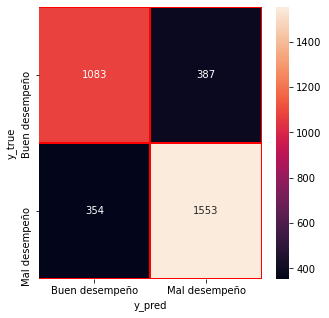

In [199]:
#realizo predicciones y grafico la matriz de confusión
y_pred=rf.predict(X_test)
confusion(y_test,y_pred)

Entrenamiento modelo: XGB Classifier

In [200]:
#Imports para entrenamiento, predicción y evaluación del modelo
import xgboost as xgb

In [201]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
print("accuracy: ",xgb_model.score(X_test,y_test))

accuracy:  0.7728753331359195


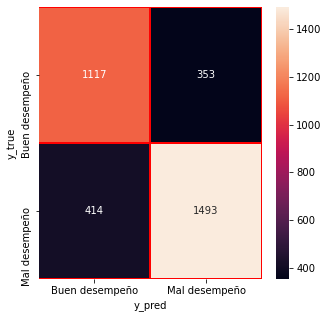

In [202]:
y_pred=xgb_model.predict(X_test)
confusion(y_test,y_pred)

In [203]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importancia_relativa']).sort_values('importancia_relativa',ascending=False)
feature_importances.head(10)

,importancia_relativa
Region_Japan,0.202925
Opportunity_Owner_Person_Name_50,0.147478
Bureaucratic_Code_Bureaucratic_Code_5,0.143155
Opportunity_Owner_Person_Name_43,0.055003
Account_Owner_OTHERS,0.034114
Account_Name_OTHERS,0.030968
Bureaucratic_Code_Bureaucratic_Code_0,0.025755
Opportunity_Name_Opportunity_Name_5036,0.023686
Delivery_Terms_OTHERS,0.019482
Region_APAC,0.018534


ARBOLES DE DECISION

In [235]:
 from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [236]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train.fillna(0,inplace=True)
X_test = X_test.replace([np.inf, -np.inf], 0)

In [237]:
X_train.fillna(0,inplace=True)

In [238]:
tree = DecisionTreeClassifier()

In [239]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [241]:
preds = tree.predict(X_test)

In [242]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1470
           1       0.80      0.80      0.80      1907

    accuracy                           0.78      3377
   macro avg       0.77      0.77      0.77      3377
weighted avg       0.78      0.78      0.78      3377



In [244]:
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importancia_relativa']).sort_values('importancia_relativa',ascending=False)
feature_importances.head(10)

,importancia_relativa
Bureaucratic_Code_Bureaucratic_Code_5,0.230619
Region_Japan,0.189286
Opportunity_Owner_Person_Name_50,0.057364
Account_Owner_OTHERS,0.052120
Bureaucratic_Code_0_Approval_1,0.035859
Delivery_Terms_OTHERS,0.031145
Product_Family_Product_Family_133,0.024968
Account_Name_OTHERS,0.024047
Opportunity_Owner_Person_Name_43,0.022922
"Pricing, Delivery_Terms_Quote_Appr_0",0.021934


 Conclusiones

En función de la pregunta de investigación planteada:¿Será posible predecir qué oportunidades comerciales se van a concretar? concluimos que sí es posible predecir el comportamiento del cliente con  un modelo predictivo.

Como se mostró anteriormente se trabajó con modelos de clasificación binaria para predecir la compra o no de aires acondicionados en base a factores internos de la empresa cualidades del producto y regiones 

Luego de haber entrenado el modelo, al evaluar el ranking de features que mejor predicen la compra podemos mencionar a los siguientes: región del comprador trámites aduaneros y gestor de la cuenta
